## Ticker input controller!

In [58]:
import re

def is_valid_ticker(ticker):
    # Define a regular expression pattern for valid stock tickers
    pattern = r'^[A-Z.0-9]+$'

    # Use re.match to check if the ticker matches the pattern
    if re.match(pattern, ticker):
        return True
    else:
        return False

# Input controller function
def input_ticker():
    while True:
        ticker = input("Enter a stock ticker: ").strip().upper()

        if is_valid_ticker(ticker):
            print(f"{ticker} is a valid ticker.")
            break
        else:
            print(f"{ticker} is not a valid ticker. Please try again.")

    return ticker

# Call the input controller function
ticker = input_ticker()

def get_valid_product_name(ticker):
    # Define a dictionary to map tickers to product names
    ticker_to_product = {
        "AAPL": "apple",
        "MSFT": "microsoft",
        "GOOGL": "alphabet",
        "TSLA": "tesla",
        "BRK.B": "berkshire-hathaway-b",
        "AMZN": "amazon",
        "FB": "facebook",
        "JPM": "jpmorgan-chase",
        "GOOG": "alphabet",
        "WMT": "walmart",
        "V": "visa",
        "PG": "procter-gamble",
        "JNJ": "johnson-johnson",
        "PFE": "pfizer",
        "VZ": "verizon",
        "T": "at-t",
        "DIS": "disney",
        "CSCO": "cisco",
        "GE": "general-electric",
        "IBM": "ibm",
        "ORCL": "oracle",
        "INTC": "intel",
        "PEP": "pepsico",
        "NFLX": "netflix",
        "XOM": "exxon-mobil",
        "KO": "coca-cola",
        "ADBE": "adobe",
        "CRM": "salesforce",
        "MRK": "merck",
        "NVDA": "nvidia",
        "TSM": "taiwan-semiconductor",
        "BAC": "bank-of-america",
        "WFC": "wells-fargo",
        "CMCSA": "comcast",
        "C": "citigroup",
        "GOOGL": "alphabet",
        "GILD": "gilead-sciences",
        "WBA": "walgreens-boots-alliance",
        "MRNA": "moderna",
        "COST": "costco",
        "AMGN": "amgen",
        "PM": "philip-morris",
        "SBUX": "starbucks",
        "MCD": "mcdonalds",
        "NKE": "nike",
        "AAP": "advance-auto-parts",
        "DE": "deere",
        "HD": "home-depot",
        "GM": "general-motors",
        "TWTR": "twitter",
        "UBER": "uber",
        "WFC": "wells-fargo",
        "GPRO": "gopro",
        # Add more ticker-to-product mappings as needed
    }

    # Convert the ticker to uppercase
    ticker = ticker.upper()

    # Check if the ticker is in the dictionary
    if ticker in ticker_to_product:
        product = ticker_to_product[ticker]
        return product
    else:
        # Handle the case where the ticker is not found
        return None
    
product = get_valid_product_name(ticker)


GOOGL is a valid ticker.


## Download HTML

In [59]:
import requests
import time

if product:
    url = f"https://www.macrotrends.net/stocks/charts/{ticker}/{product}/revenue"
else:
    print("\n Returning to default stock: Tesla \n")
    url = " https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"


html_data = requests.get(url, time.sleep(10)).text

# If not information is extracted, then connect as anonymous
if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data

'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/GOOGL/alphabet/revenue" />\r\n\t\t<title>Alphabet Revenue 2010-2023 | GOOGL | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">\r\n\t\t<meta name="description" content="Alphabet annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an incom

## Transform

In [60]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser")
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/GOOGL/alphabet/revenue" rel="canonical"/>
<title>Alphabet Revenue 2010-2023 | GOOGL | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Alphabet annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    

In [61]:
tables = soup.find_all("table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Alphabet Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$282,836</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$257,637</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$182,527</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$161,857</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$136,819</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$110,855</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$90,272</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$74,989</td>

In [62]:
import pandas as pd

for index, table in enumerate(tables):
    if (f"{product} Quarterly Revenue" in str(table)):
        table_index = index
        break

# Create a DataFrame
revenue = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        revenue = pd.concat([revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

revenue.head()

,Date,Revenue
0,2023-06-30,74604
1,2023-03-31,69787
2,2022-12-31,76048
3,2022-09-30,69092
4,2022-06-30,69685


## Process the DataFrame

In [63]:
revenue = revenue[revenue["Revenue"] != ""]
revenue.head()

,Date,Revenue
0,2023-06-30,74604
1,2023-03-31,69787
2,2022-12-31,76048
3,2022-09-30,69092
4,2022-06-30,69685


## Step 5: Store the data in sqlite

In [64]:
import sqlite3

connection = sqlite3.connect("Product.db")
connection

cursor = connection.cursor()
cursor.execute("""CREATE TABLE IF NOT EXISTS revenue (Date, Revenue)""")

tesla_tuples = list(revenue.to_records(index = False))
tesla_tuples[:5]

cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2023-06-30', '74604')
('2023-03-31', '69787')
('2022-12-31', '76048')
('2022-09-30', '69092')
('2022-06-30', '69685')
('2022-03-31', '68011')
('2021-12-31', '75325')
('2021-09-30', '65118')
('2021-06-30', '61880')
('2021-03-31', '55314')
('2020-12-31', '56898')
('2020-09-30', '46173')
('2020-06-30', '38297')
('2020-03-31', '41159')
('2019-12-31', '46075')
('2019-09-30', '40499')
('2019-06-30', '38944')
('2019-03-31', '36339')
('2018-12-31', '39276')
('2018-09-30', '33740')
('2018-06-30', '32657')
('2018-03-31', '31146')
('2017-12-31', '32323')
('2017-09-30', '27772')
('2017-06-30', '26010')
('2017-03-31', '24750')
('2016-12-31', '26064')
('2016-09-30', '22451')
('2016-06-30', '21500')
('2016-03-31', '20257')
('2015-12-31', '21329')
('2015-09-30', '18675')
('2015-06-30', '17727')
('2015-03-31', '17258')
('2014-12-31', '18103')
('2014-09-30', '16523')
('2014-06-30', '15955')
('2014-03-31', '15420')
('2013-12-31', '15707')
('2013-09-30', '13754')
('2013-06-30', '13107')
('2013-03-31', '

## Data visualization

### Time serie visualization

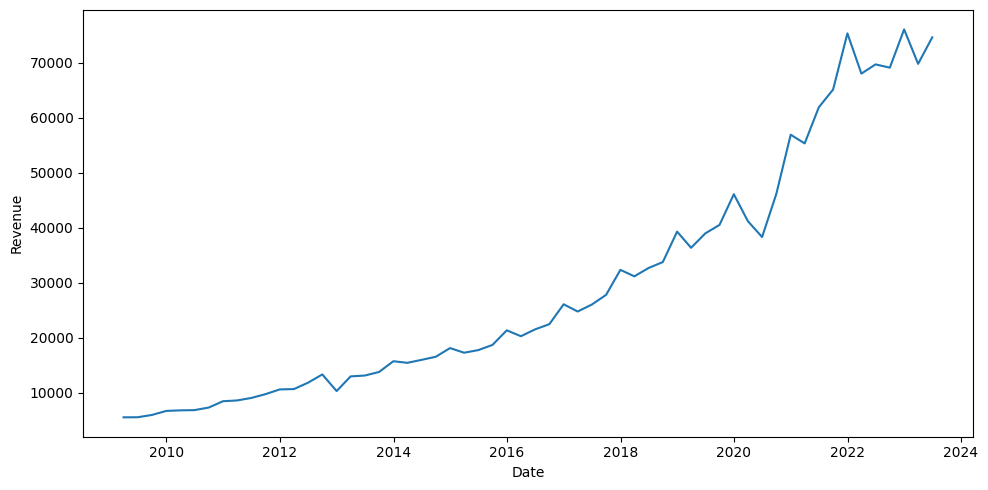

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

revenue["Date"] = pd.to_datetime(revenue["Date"])
revenue["Revenue"] = revenue["Revenue"].astype('int')
sns.lineplot(data = revenue, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

### Anual gross benefit

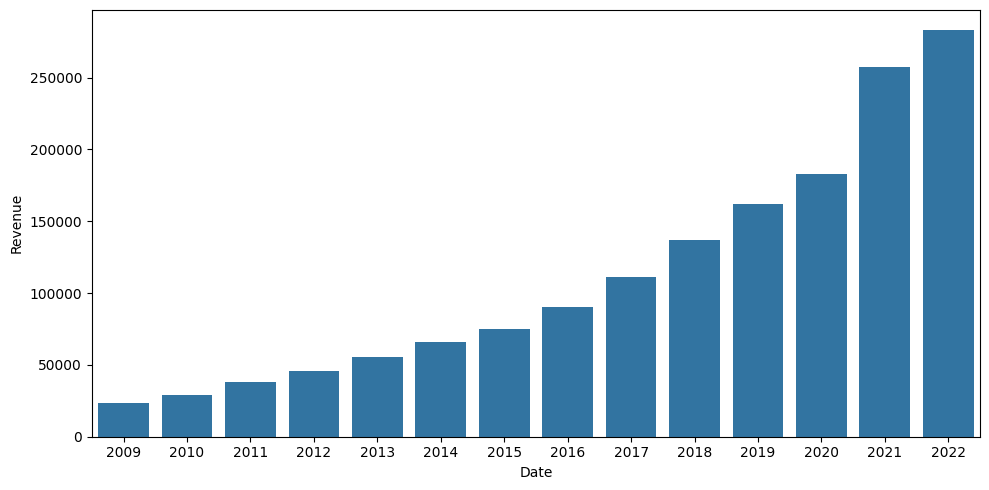

In [66]:
fig, axis = plt.subplots(figsize = (10, 5))

revenue["Date"] = pd.to_datetime(revenue["Date"])
revenue_yearly = revenue.groupby(revenue["Date"].dt.year).sum().reset_index()

sns.barplot(data = revenue_yearly[revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

### Monthly gross benefit

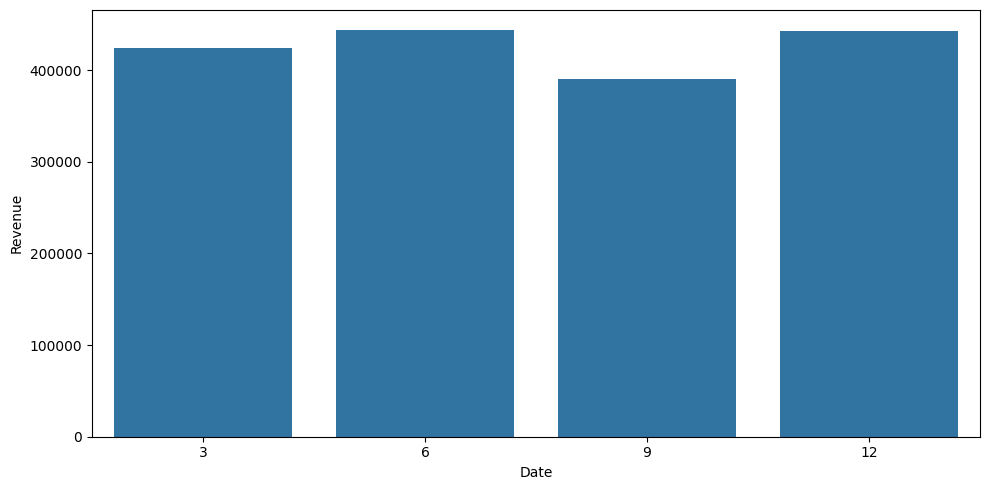

In [67]:
fig, axis = plt.subplots(figsize = (10, 5))

revenue_monthly = revenue.groupby(revenue["Date"].dt.month).sum().reset_index()

sns.barplot(data = revenue_monthly, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

# Explore here

Built an input controller to show valid tickers. Only thing is that the map is incomplete. Need to find a way to get all viable product names from tickers that can form a valid macrotrends url.